In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.sample(5)

,Age,Fare,Family,Survived
887,19.0,30.0000,0,1
759,33.0,86.5000,0,1
408,21.0,7.7750,0,0
230,35.0,83.4750,1,1
681,27.0,76.7292,0,1


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

/tmp/ipykernel_8127/3652012184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99'] = X_train['Age'].fillna(99)
/tmp/ipykernel_8127/3652012184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1'] = X_train['Age'].fillna(-1)
/tmp/ipykernel_8127/3652012184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [11]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
587,60.0,79.20,2,60.0,60.0,79.20,79.20
351,NaN,35.00,0,99.0,-1.0,35.00,35.00
648,NaN,7.55,0,99.0,-1.0,7.55,7.55
59,11.0,46.90,7,11.0,11.0,46.90,46.90
412,33.0,90.00,1,33.0,33.0,90.00,90.00


In [12]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  215.06928987607935
Age Variance after 99 wala imputation:  923.8964578770217
Age Variance after -1 wala imputation:  318.98686701749443
Original Fare variable variance:  2458.515145768933
Fare Variance after 999 wala imputation:  49567.04701112298
Fare Variance after -1 wala imputation:  2384.6088357409435


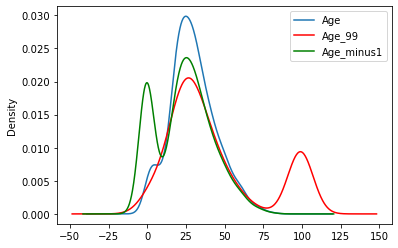

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

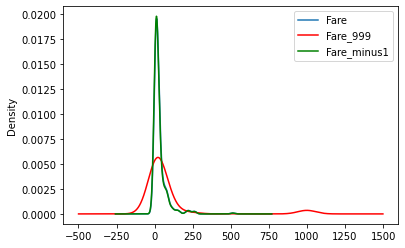

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,215.069290,63.894475,-7.173182,215.069290,215.069290,124.189478,57.848348
Fare,63.894475,2458.515146,17.790793,-63.745617,101.860977,2458.515146,2458.515146
Family,-7.173182,17.790793,2.716808,-7.845309,-4.886784,12.293212,16.998565
Age_99,215.069290,-63.745617,-7.845309,923.896458,-156.610693,-226.746809,-54.533436
Age_minus1,215.069290,101.860977,-4.886784,-156.610693,318.986867,244.195579,91.261588
Fare_999,124.189478,2458.515146,12.293212,-226.746809,244.195579,49567.047011,679.126016
Fare_minus1,57.848348,2458.515146,16.998565,-54.533436,91.261588,679.126016,2384.608836


In [16]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.082781,-0.325774,1.000000,1.000000,0.036799,0.076748
Fare,0.082781,1.000000,0.214964,-0.041989,0.114460,1.000000,1.000000
Family,-0.325774,0.214964,1.000000,-0.156592,-0.166000,0.033500,0.211190
Age_99,1.000000,-0.041989,-0.156592,1.000000,-0.288485,-0.033507,-0.036740
Age_minus1,1.000000,0.114460,-0.166000,-0.288485,1.000000,0.061412,0.104639
Fare_999,0.036799,1.000000,0.033500,-0.033507,0.061412,1.000000,0.062466
Fare_minus1,0.076748,1.000000,0.211190,-0.036740,0.104639,0.062466,1.000000


# using Sklearn

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=23)

In [18]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [19]:
trf = ColumnTransformer([
    ('trf1',imputer1,['Age']),
    ('trf2',imputer2,['Fare'])
],remainder='passthrough')

In [20]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('trf2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [21]:
trf.named_transformers_

{'trf1': SimpleImputer(fill_value=99, strategy='constant'),
 'trf2': SimpleImputer(fill_value=999, strategy='constant'),
 'remainder': 'passthrough'}

In [22]:
trf.named_transformers_['trf1'].statistics_

array([99.])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 22.    ,  66.6   ,   1.    ],
       [ 23.    ,   7.8958,   0.    ],
       [ 16.    ,  20.25  ,   2.    ],
       ...,
       [ 40.    , 999.    ,   1.    ],
       [ 21.    , 262.375 ,   4.    ],
       [ 36.    ,  24.15  ,   2.    ]])